### 使用测试数据

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [5]:
X_test = np.random.random((10, 2)) * 10

In [6]:
y_test = np.random.randint(2,size=(10,))

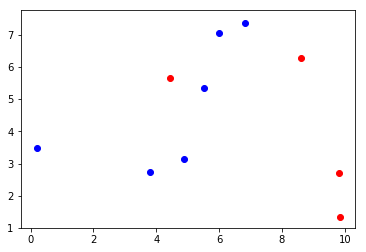

In [22]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='r')
plt.scatter()
x_predict = np.array([1.5, 6]).reshape(1, -1)
# plt.scatter(x_predict[0], x_predict[1], color='g')
plt.show()

In [8]:
from math import sqrt
from collections import Counter
def predict_y(X_train,y_train,x_test):
    distance = [sqrt(np.sum((x_test - x_train) ** 2)) for x_train in X_train]
    nearst_index = np.argsort(distance)[:3]
    nearst = [y_train[index] for index in nearst_index]
    votes = Counter(nearst)
    return votes.most_common(1)[0][0]

In [9]:
predict_y(X_test, y_test, x_predict)

1

### 使用sklearn 库的KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
classifier = KNeighborsClassifier()

In [12]:
classifier.fit(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
classifier.predict(x_predict)

array([1])

### 使用自己封装的knn库

In [14]:
from playML.KNN import KNNClassifier

In [15]:
classifier = KNNClassifier(k=5)

In [16]:
classifier.fit(X_test, y_test)

KNNClassifier(k=5)

In [19]:
classifier.predict(x_predict.reshape(1, -1))

array([1])